In [1]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_2/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_2/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_2/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_2/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.08045881  0.37055535]
 [ 1.01178578 -0.18856872]
 [ 0.01911074 -0.8179823 ]
 [ 0.80241098 -0.93228825]
 [ 0.81324553  0.73431895]]
前5个标签： [0 0 1 0 0]


In [2]:
import numpy as np

# 加载数据
black_data_test = np.load('plot2_noisy_2/black_region_noisy_test.npy')  # 黑色区域
red_data_test = np.load('plot2_noisy_2/red_region_noisy_test.npy')      # 红色区域

# 提取坐标
black_x_test = black_data_test[0, :]
black_y_test = black_data_test[1, :]
red_x_test = red_data_test[0, :]
red_y_test = red_data_test[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features_test = np.column_stack((black_x_test, black_y_test))  # 黑色特征
red_features_test = np.column_stack((red_x_test, red_y_test))       # 红色特征

black_target_test = np.zeros((black_features_test.shape[0],), dtype=int)  # 黑色标签：0
red_target_test = np.ones((red_features_test.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features_test = np.vstack((black_features_test, red_features_test))  # 合并所有特征
targets_test = np.hstack((black_target_test, red_target_test))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features_test.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features_test = features_test[indices]  # 按打乱后的索引重排特征
targets_test = targets_test[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_2/features_test.npy', features_test)  # 保存打乱的特征数组
np.save('plot2_noisy_2/targets_test.npy', targets_test)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features_test.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features_test[:5])
print("前5个标签：", targets_test[:5])


打乱后的特征数组形状： (550, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.15751165  0.36344001]
 [-0.57374599 -0.5851972 ]
 [-0.73649703  0.67541388]
 [-0.06116476  0.84098449]
 [ 0.0438122   0.59767167]]
前5个标签： [0 0 0 0 1]


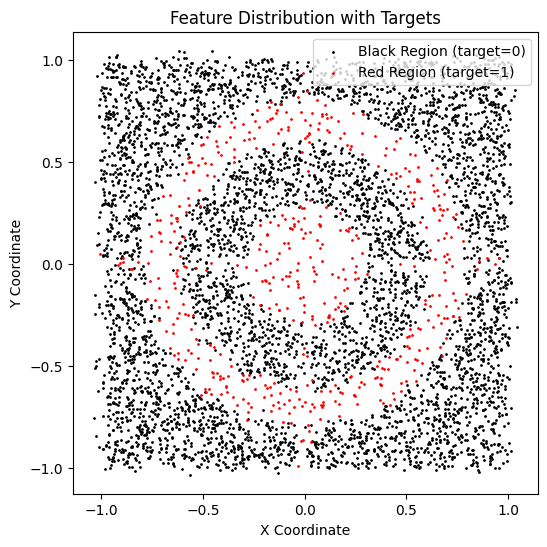

In [3]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_2/features.npy')
y = np.load('plot2_noisy_2/targets.npy')

X_test = np.load('plot2_noisy_2/features_test.npy')
y_test = np.load('plot2_noisy_2/targets_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 21:47:27,942 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 21:47:27,942 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 21:47:27,943 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 21:47:27,943 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 21:47:27,944 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 21:47:27,944 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9573, f1_score=0.8526, auc=0.9825, gmean=0.7897, sen=0.6300, spe=0.9900, aupr=0.8369 - 2024-12-14 21:47:29,780 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9527, f1_score=0.8377, auc=0.9715, gmean=0.7759, sen=0.6100, spe=0.9870, aupr=0.8426 - 2024-12-14 21:47:29,784 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9655, f1_score=0.8827, auc=0.9837, gmean=0.8277, sen=0.6900, spe=0.9930, aupr=0.8936 - 2024-12-14 21:47:29,789 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9573, f1_score=0.8510, auc=0.9590, gmean=0.7838, sen=0.6200, spe=0.9910, aupr=0.8047 - 2024-12-14 21:47:29,794 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9618, f1_score=0.8703, auc=0.9694, gmean=0.8148, sen=0.6700, spe=0.9910, aupr=0.8453 - 2024-12-14 21:47:29,799 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9573, f1_score=0.8736, auc=0.9437, gmean=0.8772, sen=0.7900, spe=0.9740, aupr=0.7950 - 2024-12-14 21:47:39,271 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9755, f1_score=0.9286, auc=0.9861, gmean=0.9453, sen=0.9100, spe=0.9820, aupr=0.8923 - 2024-12-14 21:47:39,277 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9618, f1_score=0.8885, auc=0.9620, gmean=0.8996, sen=0.8300, spe=0.9750, aupr=0.8381 - 2024-12-14 21:47:39,282 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9664, f1_score=0.8987, auc=0.9553, gmean=0.8969, sen=0.8200, spe=0.9810, aupr=0.8604 - 2024-12-14 21:47:39,287 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9582, f1_score=0.8757, auc=0.9639, gmean=0.8776, sen=0.7900, spe=0.9750, aupr=0.7834 - 2024-12-14 21:47:39,291 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9709, f1_score=0.9128, auc=0.9675, gmean=0.9141, sen=0.8500, spe=0.9830, aupr=0.8396 - 2024-12-14 21:47:50,922 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9736, f1_score=0.9233, auc=0.9721, gmean=0.9396, sen=0.9000, spe=0.9810, aupr=0.8926 - 2024-12-14 21:47:50,928 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9682, f1_score=0.9090, auc=0.9518, gmean=0.9320, sen=0.8900, spe=0.9760, aupr=0.8673 - 2024-12-14 21:47:50,934 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9682, f1_score=0.9098, auc=0.9688, gmean=0.9367, sen=0.9000, spe=0.9750, aupr=0.8625 - 2024-12-14 21:47:50,939 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9700, f1_score=0.9128, auc=0.9710, gmean=0.9282, sen=0.8800, spe=0.9790, aupr=0.8725 - 2024-12-14 21:47:50,945 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9618, f1_score=0.8922, auc=0.9708, gmean=0.9191, sen=0.8700, spe=0.9710, aupr=0.8192 - 2024-12-14 21:48:02,219 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9773, f1_score=0.9309, auc=0.9838, gmean=0.9271, sen=0.8700, spe=0.9880, aupr=0.9209 - 2024-12-14 21:48:02,224 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9764, f1_score=0.9304, auc=0.9707, gmean=0.9411, sen=0.9000, spe=0.9840, aupr=0.9175 - 2024-12-14 21:48:02,230 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9709, f1_score=0.9060, auc=0.9682, gmean=0.8735, sen=0.7700, spe=0.9910, aupr=0.8874 - 2024-12-14 21:48:02,234 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9727, f1_score=0.9152, auc=0.9529, gmean=0.9001, sen=0.8200, spe=0.9880, aupr=0.8532 - 2024-12-14 21:48:02,240 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9764, f1_score=0.9298, auc=0.9624, gmean=0.9363, sen=0.8900, spe=0.9850, aupr=0.8645 - 2024-12-14 21:48:13,610 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9809, f1_score=0.9404, auc=0.9817, gmean=0.9241, sen=0.8600, spe=0.9930, aupr=0.9386 - 2024-12-14 21:48:13,615 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9691, f1_score=0.9039, auc=0.9687, gmean=0.8881, sen=0.8000, spe=0.9860, aupr=0.9073 - 2024-12-14 21:48:13,620 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9745, f1_score=0.9244, auc=0.9878, gmean=0.9305, sen=0.8800, spe=0.9840, aupr=0.9174 - 2024-12-14 21:48:13,627 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9736, f1_score=0.9169, auc=0.9650, gmean=0.8955, sen=0.8100, spe=0.9900, aupr=0.9020 - 2024-12-14 21:48:13,633 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 4
num_layers: 5
last_layer_index 3
last_layer_index 3
UncertaintyAwareDeepForest - Accuracy: 0.9618
UncertaintyAwareDeepForest - AUC: 0.9743
UncertaintyAwareDeepForest - AUPR: 0.8582
UncertaintyAwareDeepForest - Sensitivity: 0.7400
UncertaintyAwareDeepForest - Specificity: 0.9840
UncertaintyAwareDeepForest - G-Mean: 0.8533
UncertaintyAwareDeepForest - F1 Macro: 0.8790


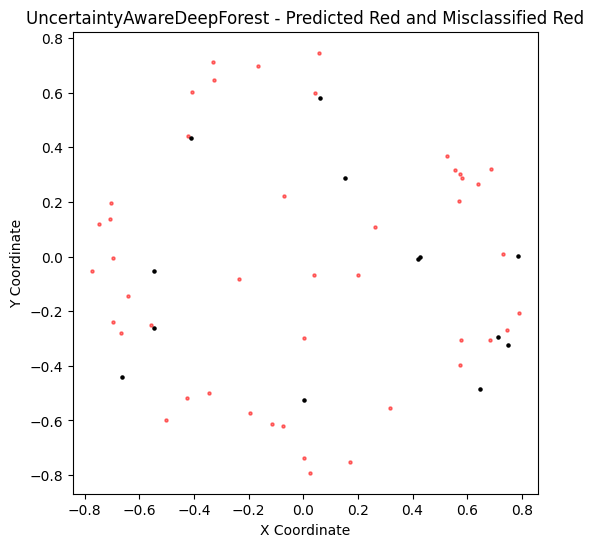

In [29]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_2"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9636
SelfPacedEnsemble - AUC: 0.9776
SelfPacedEnsemble - AUPR: 0.8585
SelfPacedEnsemble - Sensitivity: 0.7200
SelfPacedEnsemble - Specificity: 0.9880
SelfPacedEnsemble - G-Mean: 0.8434
SelfPacedEnsemble - F1 Macro: 0.8814


TypeError: 'Axes' object is not subscriptable

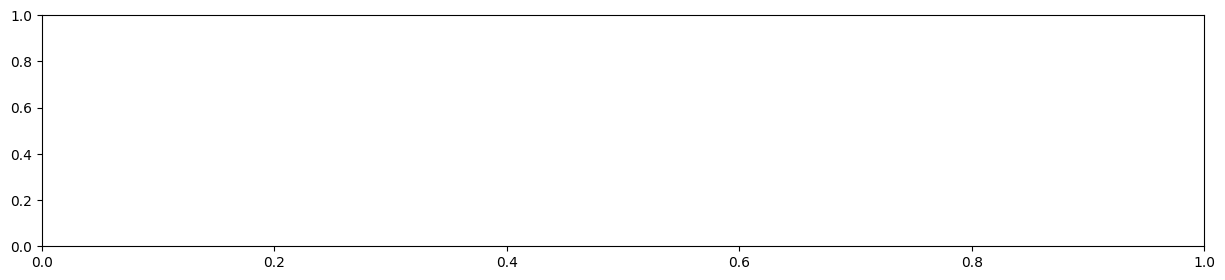

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_2"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    # 'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    # 'UnderBagging': UnderBaggingClassifier(n_estimators=45),
    # 'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    # 'RUSBoost': RUSBoostClassifier(n_estimators=50),
    # 'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    # 'AdaCost': AdaCostClassifier(n_estimators=50),
    # 'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    # 'AsymBoost': AsymBoostClassifier(n_estimators=50),
    # 'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7800
KmeansSMOTEBoost - AUC: 0.8215
KmeansSMOTEBoost - AUPR: 0.4240
KmeansSMOTEBoost - Sensitivity: 0.5600
KmeansSMOTEBoost - Specificity: 0.8020
KmeansSMOTEBoost - G-Mean: 0.6702
KmeansSMOTEBoost - F1 Macro: 0.5926


TypeError: 'Axes' object is not subscriptable

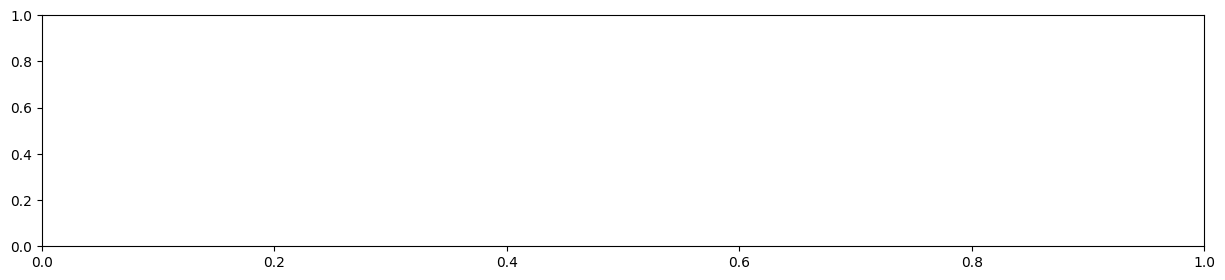

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_2"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    # 'OverBagging': OverBaggingClassifier(n_estimators=50),
    # 'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    # 'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    # 'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
